# Регуляризация линейной регрессии. Практическая работа

## Цель практической работы

Научиться строить модель линейной регрессии с регуляризацией на реальных данных.

## Что входит в практическую работу

1. Загрузить данные и ознакомиться с ними.
2. Изучить данные и провести анализ, сконструировать новые признаки.
3. Разделить данные на обучающую и тестовую выборки.
4. Реализовать построение модели с помощью библиотеки Scikit-learn.
5. Подобрать коэффициенты регуляризации.
6. Получить качество модели с помощью MSE, MAE, $R^2$.
7. Ответить на вопросы в конце блокнота.

## Что оценивается 

- Выполнены все этапы работы.
- Подобраны коэффициенты регуляризации.
- Сделан вывод по результатам.
- Модель не переобучена.
- Получена модель хорошего качества.
- Сделаны выводы в конце блокнота.

## Как отправить работу на проверку

Скачайте файл с заданиями в материалах, откройте его через Jupyter Notebook и выполните задания.

## Задача

С набором данных вы уже знакомы из прошлого модуля — это данные по продажам домов. В этот раз признаков будет чуть больше, чтобы вам было интереснее. Краткое описание признаков:

* **LotArea** — размер участка в квадратных футах.
* **LotArea_M** — размер участка в квадратных метрах.
* **Street** — тип доступа к дороге.
* **BldgType** — тип жилья.
* **OverallQual** — общее качество материала и отделки.
* **OverallCond** — общая оценка состояния.
* **YearBuilt** — первоначальная дата постройки.
* **YearRemodAdd** — дата реконструкции.
* **RoofStyle** — тип крыши.
* **ExterQual** — качество материалов снаружи.
* **ExterCond** — текущее состояние материалов снаружи.
* **Foundation** — тип фундамента.
* **TotalBsmtSF** — общая площадь подвала в квадратных футах.
* **TotalBsmtSF_M** — общая площадь подвала в квадратных метрах.
* **Heating** — тип отопления.
* **HeatingQC** — качество и состояние отопления.
* **CentralAir** — кондиционирование.
* **GrLivArea** — жилая площадь в квадратных футах.
* **GrLivArea_M** — жилая площадь в квадратных метрах.
* **Bath** — количество ванных комнат.
* **KitchenQual** — качество кухни.
* **GarageArea** — площадь гаража в квадратных футах.
* **GarageArea_M** — площадь гаража в квадратных метрах.
* **DateSold** — месяц и год продажи.
* **SaleCondition** — условия сделки.
* **SalePrice** — стоимость продажи в долларах. Это целевая переменная, которую нам нужно предсказать.

Постройте модель линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE, $R^2$. Определите, что модель не переобучилась.

## Задание 1 

Подключите необходимые библиотеки.

In [226]:
import pandas as pd
import seaborn as sns

## Задание 2

Считайте данные и посмотрите на несколько строк.

In [227]:
df = pd.read_csv('5.5 data.csv')
df

,LotArea,LotArea_M,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,...,CentralAir,GrLivArea,GrLivArea_M,Bath,KitchenQual,GarageArea,GarageArea_M,DateSold,SaleCondition,SalePrice
0,8450,785.030350,Pave,1Fam,7,5,2003,2003,Gable,Gd,...,Y,1710,158.864130,3,Gd,548,50.910844,2/2008,Normal,208500
1,9600,891.868800,Pave,1Fam,6,8,1976,1976,Gable,TA,...,Y,1262,117.243586,2,TA,460,42.735380,5/2007,Normal,181500
2,11250,1045.158750,Pave,1Fam,7,5,2001,2002,Gable,Gd,...,Y,1786,165.924758,3,Gd,608,56.485024,9/2008,Normal,223500
3,9550,887.223650,Pave,1Fam,7,5,1915,1970,Gable,TA,...,Y,1717,159.514451,1,Gd,642,59.643726,2/2006,Abnorml,140000
4,14260,1324.796780,Pave,1Fam,8,5,2000,2000,Gable,Gd,...,Y,2198,204.200794,3,Gd,836,77.666908,12/2008,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,735.513051,Pave,1Fam,6,5,1999,2000,Gable,TA,...,Y,1647,153.011241,3,TA,460,42.735380,8/2007,Normal,175000
1456,13175,1223.997025,Pave,1Fam,6,6,1978,1988,Gable,TA,...,Y,2073,192.587919,2,TA,500,46.451500,2/2010,Normal,210000
1457,9042,840.028926,Pave,1Fam,7,9,1941,2006,Gable,Ex,...,Y,2340,217.393020,2,Gd,252,23.411556,5/2010,Normal,266500
1458,9717,902.738451,Pave,1Fam,5,6,1950,1996,Hip,TA,...,Y,1078,100.149434,1,Gd,240,22.296720,4/2010,Normal,142125


## Задание 3 

Проведите разведочный анализ:

1. Выведите описательные статистики для числовых признаков.

In [228]:
df.describe()

,LotArea,LotArea_M,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,TotalBsmtSF_M,GrLivArea,GrLivArea_M,Bath,GarageArea,GarageArea_M,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,977.044879,6.099315,5.575342,1971.267808,1984.865753,1057.429452,98.238368,1515.463699,140.791124,1.947945,472.980137,43.941274,180921.195890
std,9981.264932,927.289456,1.382997,1.112799,30.202904,20.645407,438.705324,40.757041,525.480383,48.818704,0.794965,213.804841,19.863111,79442.502883
min,1300.000000,120.773900,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,31.029602,0.000000,0.000000,0.000000,34900.000000
25%,7553.500000,701.742811,5.000000,5.000000,1954.000000,1967.000000,795.750000,73.927562,1129.500000,104.933938,1.000000,334.500000,31.076054,129975.000000
50%,9478.500000,880.581085,6.000000,5.000000,1973.000000,1994.000000,991.500000,92.113325,1464.000000,136.009992,2.000000,480.000000,44.593440,163000.000000
75%,11601.500000,1077.814155,7.000000,6.000000,2000.000000,2004.000000,1298.250000,120.611320,1776.750000,165.065405,3.000000,576.000000,53.512128,214000.000000
max,215245.000000,19996.906235,10.000000,9.000000,2010.000000,2010.000000,6110.000000,567.637330,5642.000000,524.158726,4.000000,1418.000000,131.736454,755000.000000


2. Постройте матрицу корреляций числовых признаков. Удалите линейно-зависимые признаки из данных.

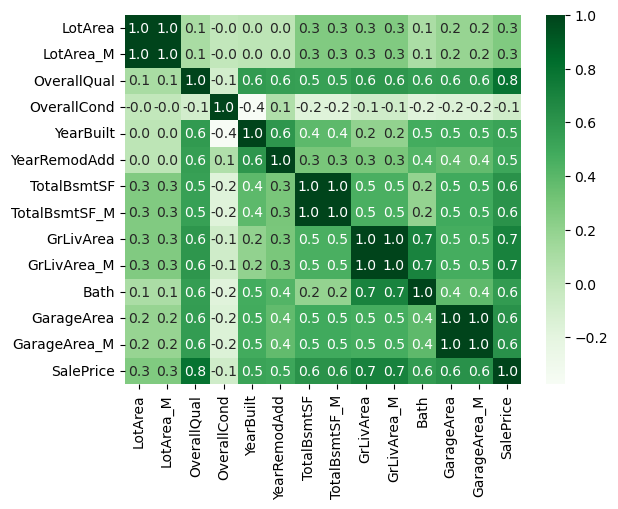

In [229]:
df2 = df[['LotArea','LotArea_M','OverallQual','OverallCond','YearBuilt','YearRemodAdd','TotalBsmtSF','TotalBsmtSF_M','GrLivArea','GrLivArea_M','Bath','GarageArea','GarageArea_M','SalePrice']]
df2
matrix = df2.corr() 
sns.heatmap(matrix, cmap="Greens", annot=True, fmt='.1f')
df.drop(columns = ['LotArea_M','TotalBsmtSF_M','GrLivArea_M','GarageArea_M'], axis = 1, inplace = True)

3. Посмотрите на индивидуальные графики зависимости целевой функции и отдельной переменной.

/Users/gagarindmitrij/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


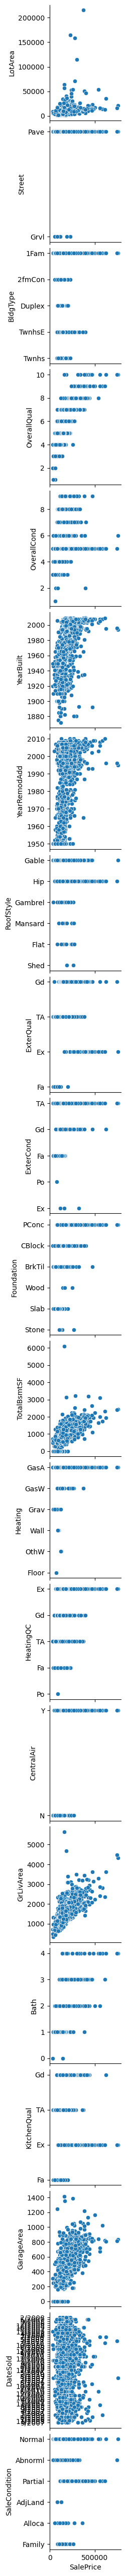

In [230]:
sns.pairplot(df,x_vars= 'SalePrice', y_vars = df.drop(columns = 'SalePrice', axis = 1))

4. Сделайте предварительные выводы.

5. Создайте дополнительные переменные из уже имеющихся, обоснуйте свои решения.

In [231]:
#df['area'] = df['LotArea'] + df['TotalBsmtSF'] + df['GrLivArea']+ df['GarageArea']
df['Overall'] = df['OverallQual'] + df['OverallCond'] # общее качество как сумма качеств материалов и текущего состояния
#преобразование даты в год и месяц (от времени года и самого года может зависеть цена)
df['Datemonth'] = df['DateSold'].apply(lambda x: x.split('/')[0]) 
df['Dateyear'] = df['DateSold'].apply(lambda x: x.split('/')[1]) 

<Axes: >

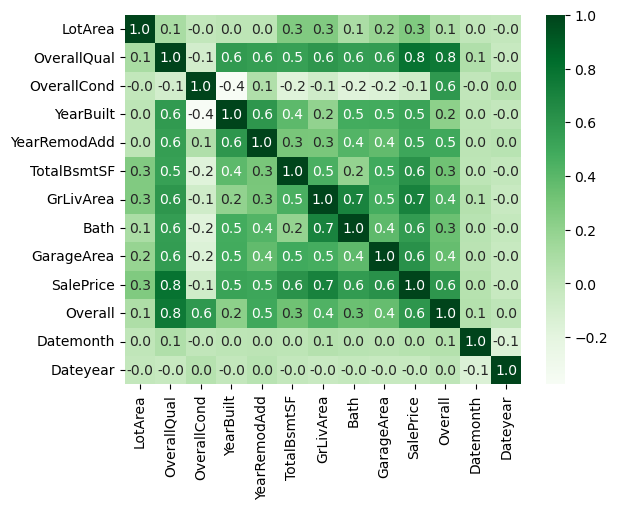

In [232]:
df['Datemonth'] = df['Datemonth'].astype(int)
df['Dateyear'] = df['Dateyear'].astype(int)
df3 = df[['LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'Bath', 'GarageArea','SalePrice', 'Overall', 'Datemonth', 'Dateyear']]
matrix = df3.corr() 
sns.heatmap(matrix, cmap="Greens", annot=True, fmt='.1f')

## Задание 4 

Подготовьте данные:

1. Разделите данные на тренировочную и тестовую выборки.
2. Закодируйте категориальные признаки в тренировочной и тестовой выборках.
3. Подготовьте числовые признаки в тренировочной и тестовой выборках к передаче в модель: приведите их к единому масштабу.

In [ ]:
#порядок преобразований изменен, так как в ином случае количество столбцов в трейн_х и трейн_у 
#будет разным и предикт сделать не получится

In [233]:
df = pd.get_dummies(df, dtype = int)

In [234]:
x = df.drop(['SalePrice'], axis = 1)
y = df['SalePrice']

In [235]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()  
std_scaler.fit(x) 
x = std_scaler.transform(x)

In [236]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.7, random_state= 42)

## Задание 5

Займитесь обучением модели:

1. Обучите модель линейной регрессии без регуляризации. Посмотрите на веса полученной модели. Сделайте предсказания по обучающей и тестовой выборкам.

In [237]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [238]:
print('w_0:', model.intercept_)
print('w_1:', model.coef_)

w_0: 173416.6993368871
w_1: [ 6.12566331e+03 -1.25180448e+16 -1.00723838e+16  1.06692628e+04
  8.74558735e+02  5.36691074e+03  2.22316541e+04  1.49983399e+03
  6.49210038e+03  1.53287800e+16 -6.20909210e+17  1.65057059e+17
  5.04460591e+17  5.04460591e+17 -1.62958429e+18 -6.33852567e+17
 -8.14881187e+17 -7.43379269e+17 -1.17968552e+18 -5.29689837e+16
 -2.32998896e+17 -4.87580394e+16 -2.23785923e+17 -3.89491089e+16
 -2.08549647e+16  3.05563647e+17  1.60674460e+17  7.77753061e+17
  8.00050990e+17  1.01540471e+17  3.07538362e+17  6.72702253e+17
  5.86646411e+16  7.33673420e+17  6.70311657e+17  1.10748363e+18
  1.10994146e+18  2.84109334e+17  1.42942209e+17  1.01179625e+17
 -1.39664524e+16 -7.81623399e+16 -5.89084156e+16 -3.68757011e+16
 -1.97447764e+16 -2.79041721e+16 -2.98783924e+17 -1.07632945e+17
 -2.21867685e+17 -1.56354838e+16 -2.72047920e+17 -5.57577979e+17
 -5.57577979e+17 -3.26099158e+17 -2.08165889e+17 -6.32826631e+17
 -6.45495019e+17 -1.14721133e+17 -1.42345864e+17 -1.54024895e+

In [239]:
y_predict_train = model.predict(x_train)
y_predict_test = model.predict(x_test)

In [247]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.8065857714878667
0.8253669518764032


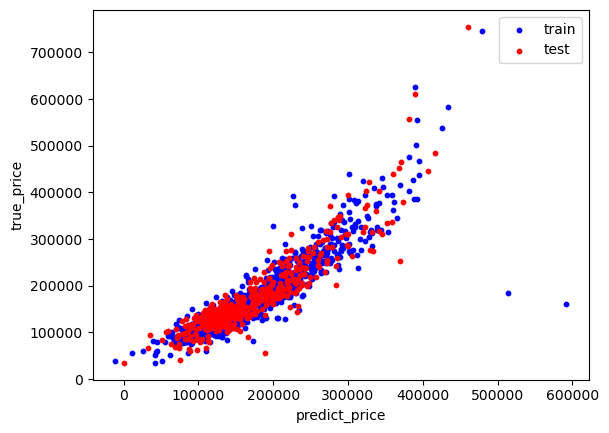

In [250]:
import matplotlib.pyplot as plt
plt.scatter(y_predict_train, y_train, s=10, label = 'train', c='b')
plt.scatter(y_predict_test, y_test, s=10, label = 'test', c='r')
plt.xlabel('predict_price')
plt.ylabel('true_price')
plt.legend()
plt.show()

2. Понаблюдайте, как ведёт себя модель с L1-регуляризацией (Lasso). Найдите лучший параметр регуляризации. Сделайте предсказания по обучающей и тестовой выборкам, замерьте качество с помощью MAE, MSE, $R^2$. Для воспроизводимости результатов задайте параметр `random_state=42` при определении модели Lasso.

In [256]:
from sklearn.linear_model import Lasso

for i in range(-4, 5):
  alpha = 10**i
  lasso_regression = Lasso(alpha=alpha, random_state= 42) # alpha — величина регуляризации

  # обучение
  lasso_regression.fit(x_train, y_train)

  # вывод точности предсказания
  print('-'*5, 'lambda =', alpha, '-'*5)
  print(lasso_regression.score(x_train, y_train))
  print(lasso_regression.score(x_test, y_test))

/Users/gagarindmitrij/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.726e+10, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(
/Users/gagarindmitrij/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.726e+10, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


----- lambda = 0.0001 -----
0.8116697674679318
0.8302408688667307
----- lambda = 0.001 -----
0.8116697674679114
0.8302408925514126


/Users/gagarindmitrij/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.726e+10, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(
/Users/gagarindmitrij/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.821e+10, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


----- lambda = 0.01 -----
0.8116697674658627
0.8302411293959963
----- lambda = 0.1 -----
0.8116697672621164
0.8302434195562514
----- lambda = 1 -----
0.8116697479891894
0.8302660205655292
----- lambda = 10 -----
0.8116678673153574
0.8304695707323253
----- lambda = 100 -----
0.8114917551749058
0.8323754186092716
----- lambda = 1000 -----
0.8030004708869436
0.8373969479824327
----- lambda = 10000 -----
0.7332580612857295
0.7645668539912098


/Users/gagarindmitrij/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.984e+09, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


In [269]:
lasso_regression = Lasso(alpha=100, random_state= 42)
lasso_regression.fit(x_train, y_train)

Lasso(alpha=100, random_state=42)

In [270]:
y_predict_train = lasso_regression.predict(x_train)
y_predict_test = lasso_regression.predict(x_test)

In [271]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [272]:
train_mse = mean_squared_error(y_train, y_predict_train)
print("Train MSE: {}".format(train_mse))
train_mae = mean_absolute_error(y_train, y_predict_train)
print("Train MAE: {}".format(train_mae))
train_r2 = r2_score(y_train, y_predict_train)
print("Train R2: {}".format(train_r2))

Train MSE: 1135652430.4738479
Train MAE: 19981.72216987409
Train R2: 0.8114917551749058


Посмотрите на веса полученной модели. Какой вывод можно сделать?

In [273]:
print('w_0:', lasso_regression.intercept_)
print('w_1:', lasso_regression.coef_)

w_0: 180241.0227489862
w_1: [ 5.80337647e+03  1.48406006e+04  0.00000000e+00  1.12623111e+04
  6.30315213e+02  5.54530212e+03  2.25412299e+04  1.18293472e+03
  7.22452638e+03  7.99881276e+03  0.00000000e+00  0.00000000e+00
 -1.18348672e+02  5.38117852e-13  4.78499544e+03  3.77490169e+02
 -1.69623845e+03 -2.54987578e+03 -0.00000000e+00  7.41104994e+02
 -3.15089112e+03 -5.28263506e+02  0.00000000e+00  1.29540187e+02
  2.68193994e+02  3.04712642e+03  2.79587626e+02  0.00000000e+00
 -3.99512858e+03  8.44117911e+01  2.53099589e+02 -5.69026787e+02
  1.44308087e+02  0.00000000e+00 -3.82242641e+02 -0.00000000e+00
  1.42655887e+03 -0.00000000e+00 -0.00000000e+00 -1.07395178e+03
  3.89065366e+02 -5.51005403e+02  0.00000000e+00  0.00000000e+00
 -1.38698261e+03  1.53639861e+03  1.52315759e+03  1.12426861e+03
 -9.83292040e+02 -1.30708167e+02 -0.00000000e+00 -1.21151071e+03
  4.42816517e-11  9.88231109e+03 -1.38548922e+02  0.00000000e+00
 -2.49573839e+03 -2.99856790e+02 -6.77725401e+02 -4.04452599e+

3. Понаблюдайте, как ведёт себя модель с L2-регуляризацией (Ridge). Найдите лучший параметр регуляризации. Сделайте предсказания по обучающей и тестовой выборкам, замерьте качество с помощью MAE, MSE, $R^2$. Для воспроизводимости результатов задайте параметр `random_state=42` при определении модели Ridge.

In [276]:
from sklearn.linear_model import Ridge

for i in range(-9, 1):
  alpha = 10**i
  ridge_regression = Ridge(alpha=alpha, random_state= 42)

  ridge_regression.fit(x_train, y_train)

  print('-'*5, 'lambda =', alpha, '-'*5)
  print(ridge_regression.score(x_train, y_train))
  print(ridge_regression.score(x_test, y_test))

----- lambda = 1e-09 -----
0.8116697674679321
0.8302408662350846
----- lambda = 1e-08 -----
0.8116697674679321
0.8302408662349667
----- lambda = 1e-07 -----
0.8116697674679321
0.8302408662337868
----- lambda = 1e-06 -----
0.8116697674679321
0.8302408662219891
----- lambda = 1e-05 -----
0.8116697674679321
0.8302408661040115
----- lambda = 0.0001 -----
0.8116697674679274
0.8302408649242343
----- lambda = 0.001 -----
0.8116697674674596
0.8302408531263421
----- lambda = 0.01 -----
0.811669767420693
0.8302407351354059
----- lambda = 0.1 -----
0.8116697627511831
0.8302395540279708
----- lambda = 1 -----
0.8116693028421064
0.8302276264644578


In [280]:
ridge_regression = Ridge(alpha=0.001, random_state= 42)
ridge_regression.fit(x_train, y_train)

Ridge(alpha=0.001, random_state=42)

In [281]:
y_predict_train = ridge_regression.predict(x_train)
y_predict_test = ridge_regression.predict(x_test)

In [282]:
train_mse = mean_squared_error(y_train, y_predict_train)
print("Train MSE: {}".format(train_mse))
train_mae = mean_absolute_error(y_train, y_predict_train)
print("Train MAE: {}".format(train_mae))
train_r2 = r2_score(y_train, y_predict_train)
print("Train R2: {}".format(train_r2))

Train MSE: 1134580010.045338
Train MAE: 20027.117912313344
Train R2: 0.8116697674674596


Посмотрите на веса полученной модели. Какой вывод можно сделать?

In [322]:
print('w_0:', ridge_regression.intercept_)
print('w_1:', ridge_regression.coef_)

w_0: 180235.79614040232
w_1: [-4.09085663e+03 -3.59317903e+03 -3.26597350e+03 -2.70683469e+03
 -2.53613564e+03 -1.97605438e+03 -1.94378462e+03 -1.90006209e+03
 -1.71152765e+03 -1.69087307e+03 -1.67478815e+03 -1.58552647e+03
 -1.43419884e+03 -1.41837052e+03 -1.33002774e+03 -1.20167632e+03
 -1.16552076e+03 -1.14234837e+03 -1.12298041e+03 -1.12204123e+03
 -1.09019151e+03 -1.06417558e+03 -1.00342868e+03 -9.77993969e+02
 -9.32934986e+02 -9.21693258e+02 -8.81970790e+02 -8.70450423e+02
 -8.27685580e+02 -8.23578416e+02 -7.36340463e+02 -7.16224652e+02
 -7.09878573e+02 -6.90098255e+02 -6.67644056e+02 -5.89673851e+02
 -5.43078000e+02 -5.19876989e+02 -5.01697026e+02 -4.57515511e+02
 -4.54430288e+02 -4.19941387e+02 -3.93281700e+02 -3.70054584e+02
 -3.69137364e+02 -3.62161933e+02 -3.45454631e+02 -2.68808136e+02
 -2.36274462e+02 -1.94671004e+02 -1.67617042e+02 -1.37510987e+02
 -1.32243619e+02 -5.36741391e+00 -4.08860159e+00  5.88561138e+00
  6.38093918e+00  6.42804879e+01  6.57929548e+01  1.29084945e

## Задание 6

Ответьте на следующие вопросы:

1. В последней обученной модели выберите три признака с наибольшими положительными коэффициентами. Можно ли утверждать, что чем больше значения этих признаков, тем больше сумма сделки?

In [310]:
list2 = list(ridge_regression.coef_)
list2.sort(reverse = True)
list2[:3]

[22554.129685174314, 13183.028496014174, 11339.638547753113]

2. В последней обученной модели выберите три признака с наибольшими отрицательными коэффициентами. Можно ли утверждать, что чем больше значения этих признаков, тем меньше сумма сделки?

In [314]:
list2 = list(ridge_regression.coef_)
list2.sort()
list2[:3]

[-4090.8566275844273, -3593.179029357946, -3265.973495808273]

3. В модели Lasso выберите три признака с нулевыми коэффициентами. Как вы думаете, почему модель их исключила? Можно ли смело утверждать, что сумма сделки от этих признаков не зависит?

In [321]:
list2 = list(lasso_regression.coef_)
list2.sort()
list2[57:60]

[0.0, 0.0, -0.0]

## Заключение

В этом модуле с помощью регуляризации вы научились обучать модели линейной регрессии с регуляризацией, подбирать коэффициент регуляризации alpha, а также отбирать признаки с помощью L1-регуляризации. 